In [ ]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
actions = [
           'sincerely',
           'if',
           'rise',
           'will'
]

data = np.concatenate([
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_sincerely_1633676816.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_sincerely_1633676993.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_sincerely_1633677318.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_sincerely_1633680756.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_sincerely_1633682879.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_sincerely_1633683194.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_if_1633676816.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_if_1633676993.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_if_1633677318.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_if_1633680756.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_if_1633682879.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_if_1633683194.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_rise_1633676816.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_rise_1633676993.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_rise_1633677318.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_rise_1633680756.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_rise_1633682879.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_rise_1633683194.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_will_1633676816.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_will_1633676993.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_will_1633677318.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_will_1633680756.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_will_1633682879.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/TWOseq_will_1633683194.npy')
], axis=0)

data.shape

(7280, 30, 195)

In [ ]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(7280, 30, 194)
(7280,)


In [ ]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(7280, 4)

In [ ]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(6552, 30, 194) (6552, 4)
(728, 30, 194) (728, 4)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                66304     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 132       
Total params: 68,516
Trainable params: 68,516
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/150
205/205 [==============================] - 5s 19ms/step - loss: 61.5110 - acc: 0.3678 - val_loss: 7.7988 - val_acc: 0.5330

Epoch 00001: val_acc improved from -inf to 0.53297, saving model to models/model.h5
Epoch 2/150
205/205 [==============================] - 4s 18ms/step - loss: 5.4590 - acc: 0.5603 - val_loss: 4.1637 - val_acc: 0.6030

Epoch 00002: val_acc improved from 0.53297 to 0.60302, saving model to models/model.h5
Epoch 3/150
205/205 [==============================] - 4s 18ms/step - loss: 3.2229 - acc: 0.6221 - val_loss: 2.9528 - val_acc: 0.6277

Epoch 00003: val_acc improved from 0.60302 to 0.62775, saving model to models/model.h5
Epoch 4/150
205/205 [==============================] - 4s 18ms/step - loss: 2.0823 - acc: 0.6654 - val_loss: 1.2800 - val_acc: 0.7404

Epoch 00004: val_acc improved from 0.62775 to 0.74038, saving model to models/model.h5
Epoch 5/150
205/205 [==============================] - 4s 17ms/step - loss: 1.7379 - acc: 0.6830 - val_loss: 1.087

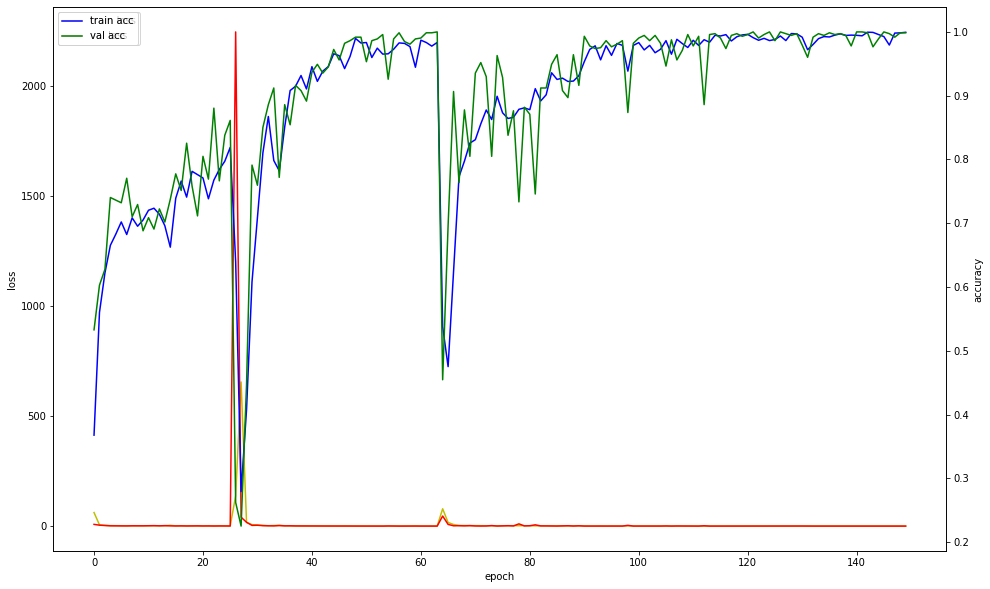

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[537,   0],
        [  0, 191]],

       [[546,   0],
        [  0, 182]],

       [[542,   0],
        [  0, 186]],

       [[559,   0],
        [  0, 169]]])

In [ ]:
from keras.models import load_model

model.save('TWOmodel5.h5')

from google.colab import files
files.download('TWOmodel5.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>